<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

Αναστάσιος Παπαζαφειρόπουλος,     ΑΜ:03118079

In [1]:
#imports
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

In [2]:
G = nx.read_edgelist("out.dbpedia-similar", comments='%')
selfloops = nx.selfloop_edges(G)
G.remove_edges_from(selfloops)
print(G)

Graph with 430 nodes and 564 edges


 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [3]:
def average_node_degree(Graph):
    degrees = degrees = [d for n, d in Graph.degree()]
    summ = 0
    for degree in degrees:
        summ += degree
    mean = summ/len(Graph.nodes())
    return mean

def stats(Graph):
    node_count = len(Graph)
    edge_count = Graph.size()
    average_node_degree_num = average_node_degree(Graph)
    connected_components = nx.number_connected_components(Graph)

    print("Number of Nodes:\t\t" + str(node_count))
    print("Number of Edges:\t\t" + str(edge_count))
    print("Average Degree:\t\t" + str(average_node_degree_num))
    print("Number of Connected Components:\t" + str(connected_components))
    
    return node_count, edge_count, average_node_degree_num, connected_components

In [4]:
print("Initial:")
initial_node_count, initial_edge_count, initial_average_node_degree_num, initial_connected_components = stats(G)

Initial:
Number of Nodes:		430
Number of Edges:		564
Average Degree:		2.6232558139534885
Number of Connected Components:	95


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [5]:
adj_matrix = nx.to_numpy_matrix(G, [str(i) for i in range(1, 431)])
pairs = initial_node_count**2
unconnected = set()
row_num = 0
for row in adj_matrix.A:
    row_num += 1
    column_num = 1
    for cell in row:
        if (column_num == row_num):
            break
        elif (cell == 0.):
            unconnected.add((str(row_num), str(column_num)))
        column_num += 1
print('Number of total pairs:\t\t' + str(pairs))
print('Number of unconnected pairs:\t' + str(len(unconnected)))
print('Percentage of unconnected pairs:\t' + str((len(unconnected)/pairs*100)) + "%")

Number of total pairs:		184900
Number of unconnected pairs:	91671
Percentage of unconnected pairs:	49.57869118442401%


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [6]:
# removable edges: check splitting and number of nodes
removable_edges = set()
new_G = G.copy()
for edge in G.edges():
    Graph = new_G.copy()
    Graph.remove_edge(*edge)
    if (nx.number_connected_components(Graph) == initial_connected_components) and (len(Graph) == initial_node_count):
        removable_edges.add(edge)
        new_G.remove_edge(*edge)
print("Number of removable edges:\t"+str(len(removable_edges)))

Number of removable edges:	229


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [7]:
#dataframe of removable edges (they will function as positive samples)
df1 = pd.DataFrame(data=removable_edges, columns=['source','target'])
df1 = df1.assign(link=1)

#dataframe of unconnected node pairs (they will function as negative samples)
df2 = pd.DataFrame(data=unconnected, columns=['source','target'])
df2 = df2.assign(link=0)

#merge in one dataframe
df = df1.append(df2, ignore_index=True)
df

,source,target,link
0,186,188,1
1,149,150,1
2,68,99,1
3,149,151,1
4,336,342,1
...,...,...,...
91895,265,42,0
91896,371,216,0
91897,64,48,0
91898,372,217,0


In [8]:
#build graph G'=G_reduced
G_reduced = new_G
print("Reduced:")
temp = stats(G_reduced)
print()
print("Initial:")
temp = stats(G)

Reduced:
Number of Nodes:		430
Number of Edges:		335
Average Degree:		1.558139534883721
Number of Connected Components:	95

Initial:
Number of Nodes:		430
Number of Edges:		564
Average Degree:		2.6232558139534885
Number of Connected Components:	95


<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [9]:
jc_G_reduced = nx.algorithms.jaccard_coefficient(G_reduced)

k=79%10

k_greatest_jc = []
for i in range(k):
    k_greatest_jc.append(('','',-1))

for i,j,l in jc_G_reduced:
    if l > k_greatest_jc[0][2]:
        k_greatest_jc[0] = (i,j,l)
        k_greatest_jc = sorted(k_greatest_jc, key = lambda x : x[2])

print(str(k) + ' Pairs with the greater JC metric value:')
for i in k_greatest_jc:
    print(i)

9 Pairs with the greater JC metric value:
('404', '399', 1.0)
('404', '403', 1.0)
('404', '401', 1.0)
('235', '234', 1.0)
('400', '402', 1.0)
('400', '399', 1.0)
('400', '403', 1.0)
('400', '401', 1.0)
('400', '404', 1.0)


In [10]:
def JCfunction(G, threshold_jc):
    pos = []
    neg = []

    for u in range(G.number_of_nodes()):
        for v in range(u+1, G.number_of_nodes()):
            ebunch = [(str(u+1), str(v+1))]
            jc = nx.algorithms.jaccard_coefficient(G,ebunch)
            for x,y,p in jc:
                if p >= threshold_jc:
                    pos.append((x,y))
                else:
                    neg.append((x,y))
                    
    tp = []
    fp = []
    tn = []
    fn = []

    for u,v in pos:
        if G.has_edge(u,v):
            tp.append((u,v))
        else:
            fp.append((u,v))

    for u,v in neg:
        if G.has_edge(u,v):
            fn.append((u,v))
        else:
            tn.append((u,v))

    tp = len(tp)
    fp = len(fp)
    tn = len(tn)
    fn = len(fn)
    print(tp,fp,tn,fn)

    jc_prec = tp/(tp+fp) 
    jc_rec = tp/(tp+fn) 
    jc_acc = (tp+tn)/(tp+tn+fp+fn)

    return jc_prec,jc_rec, jc_acc

In [11]:
thresholds = [0.1, 0.15, 0.25, 0.5, 1]
jc_prec,jc_rec, jc_acc = [],[],[]

for th in thresholds:
    print("Threshold = " + str(th))
    prec, rec, acc = JCfunction(G_reduced, th)
    print(prec, rec, acc)
    jc_prec.append(prec)
    jc_rec.append(rec)
    jc_acc.append(acc)
    print()

Threshold = 0.1
0 505 91395 335
0.0 0.0 0.9908928281021304

Threshold = 0.15
0 487 91413 335
0.0 0.0 0.9910879817856562

Threshold = 0.25
0 448 91452 335
0.0 0.0 0.9915108147666287

Threshold = 0.5
0 331 91569 335
0.0 0.0 0.9927793137095463

Threshold = 1
0 247 91653 335
0.0 0.0 0.9936900308993333



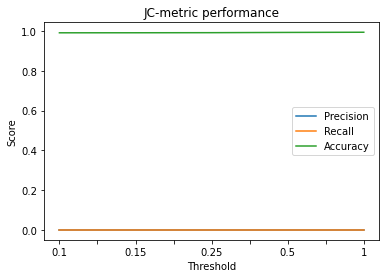

In [12]:
jc_metrics = pd.DataFrame([jc_prec, jc_rec, jc_acc]).transpose()
jc_metrics.rename(columns={0:'Precision', 1:'Recall', 2:'Accuracy'},
                  index={0:'0.1', 1:'0.15', 2:'0.25', 3:'0.5', 4:'1'}, inplace=True)
jc_metrics.plot()
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('JC-metric performance')
plt.show()

#### Σχόλιο:
Οι καμπύλες του Precision και του Recall ταυτίζονται στο μηδέν.

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

#### 3(i)
Αρχικά, θα υπολογίσουμε τις αντίστοιχες τιμές για κάθε μετρική και ύστη συνέχεια θα φτιάξουμε μια λίστα αποτελούμενη από τις τιμές της κάθε μετρικής με τα ζευγάρια των κόμβων του γράφου στην ίδια σειρά.Οπότε, με χρήση της συνάρτησης corrcoeff του πακέτου NumPy θα υπολογίσουμε τον συντελεστή συσχέτισης ανάμεσα σε κάθε μετρική και θα βρούμρ αν υπάρχει κάποια έντονη τάση συσχέτισης ανάμεσά τους.


In [13]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
df_copy = df.copy()
df_copy

,source,target,link
0,186,188,1
1,149,150,1
2,68,99,1
3,149,151,1
4,336,342,1
...,...,...,...
91895,265,42,0
91896,371,216,0
91897,64,48,0
91898,372,217,0


In [14]:
df_copy['index'] =  "(" + df_copy['source'].astype(str) + "," + df_copy['target'].astype(str) + ")"
df_copy.set_index('index', inplace=True)
df_copy

,source,target,link
index,,,
"(186,188)",186,188,1
"(149,150)",149,150,1
"(68,99)",68,99,1
"(149,151)",149,151,1
"(336,342)",336,342,1
...,...,...,...
"(265,42)",265,42,0
"(371,216)",371,216,0
"(64,48)",64,48,0


In [15]:
# functions to calculate metrics for two nodes in the same row of the dataframe
def jc_calculation(G, row):
    u = str(row['source'])
    v = str(row['target'])
    jc_generator = nx.algorithms.jaccard_coefficient(G,[(u,v)])
    for x,y,s in jc_generator:
        jc_score = s
    return jc_score


def pa_calculation(G, row):
    u = str(row['source'])
    v = str(row['target'])
    jc_generator = nx.algorithms.preferential_attachment(G,[(u,v)])
    for x,y,s in jc_generator:
        jc_score = s
    return jc_score

def ra_calculation(G, row):
    u = str(row['source'])
    v = str(row['target'])
    jc_generator = nx.algorithms.resource_allocation_index(G,[(u,v)])
    for x,y,s in jc_generator:
        jc_score = s
    return jc_score

df_copy['Jacc.Coeff.'] = df_copy.apply(lambda row: jc_calculation(G_reduced, row), axis=1)
df_copy['Pr.Attachment'] = df_copy.apply(lambda row: pa_calculation(G_reduced, row), axis=1)
df_copy['Resource Allocation'] = df_copy.apply(lambda row: ra_calculation(G_reduced, row), axis=1)


In [16]:
df_copy.drop(['source', 'target'], axis=1, inplace=True)
df_copy

,link,Jacc.Coeff.,Pr.Attachment,Resource Allocation
index,,,,
"(186,188)",1,0.0,1,0.000000
"(149,150)",1,0.5,2,0.250000
"(68,99)",1,0.0,2,0.000000
"(149,151)",1,0.0,1,0.000000
"(336,342)",1,1.0,1,0.066667
...,...,...,...,...
"(265,42)",0,0.0,2,0.000000
"(371,216)",0,0.0,1,0.000000
"(64,48)",0,0.0,6,0.000000


<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
 
X = df_copy.drop('link',axis=1)  #features, uncomment and complete
y = df_copy['link'] #target, uncomment and complete

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0) #uncomment and complete

In [18]:
classifier = RandomForestClassifier()   

from sklearn.preprocessing import MinMaxScaler 
mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
model = GridSearchCV(classifier, param_grid = parameters) 

In [19]:
model.fit(X_train_scaled, y_train.values.ravel())#train the model, uncomment and complete

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [20]:
predictions = model.predict(X_test_scaled)
print('First 9 predictions:')
print(predictions[:9]) #get (A.M. last digit) first predictions
print()
print('First 9 true values:')
print(y_test[:9])
print()
accuracy = accuracy_score(y_test, predictions)

print('Accuracy score:\t\t' + str(accuracy))

First 9 predictions:
[0 0 0 0 0 0 0 0 0]

First 9 true values:
index
(377,326)    0
(362,287)    0
(288,87)     0
(402,149)    0
(394,336)    0
(315,182)    0
(351,115)    0
(277,106)    0
(420,157)    0
Name: link, dtype: int64

Accuracy score:		0.998955386289445


In [21]:
# create a dataset with only (1,47) and calculate values to use it with our model

jc_gen = nx.algorithms.jaccard_coefficient(G,[('1','47')])
for x,y,s in jc_gen:
    jc_score = s
    
pa_gen = nx.algorithms.preferential_attachment(G,[('1','47')])
for x,y,s in pa_gen:
    pa_score = s

ra_gen = nx.algorithms.resource_allocation_index(G,[('1','47')])
for x,y,s in ra_gen:
    ra_score = s

data = {'Jacc.Coeff.':[jc_score], 'Pr.Attachment':[pa_score], 'Resource Allocation':[ra_score]}
X_prob = pd.DataFrame(data, index=['(1,47)'])
X_prob_sc = mm_scaler.transform(X_prob)
predict_proba = model.predict_proba((X_prob_sc))
print('Propability that nodes (1, 47) are connected:\t' + str(predict_proba[0][1]))

Propability that nodes (1, 47) are connected:	0.042042157620277104


<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [22]:
#install node2vec with conda / pip
!pip install node2vec 
from node2vec import Node2Vec   
import multiprocessing          

In [23]:
#generate walks
workers = multiprocessing.cpu_count()
node2vec_walker = Node2Vec(G_reduced, 128, 80, 10, 1.0, 1.0, workers=workers) #uncomment and complete

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

In [24]:
#train node2vec model
n2v_model = node2vec_walker.fit(window=10, min_count=1) #uncomment and complete

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [25]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
X = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df['source'], df['target'])]
y = df['link']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)  #uncomment and complete

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train, y_train) #uncomment and complete
predicts = classifier.predict(X_test)
accur = accuracy_score(y_test, predicts)

print("Model's Accuracy with Node2Vec algorithm:" + " " + str(accur))

Model's Accuracy with Node2Vec algorithm: 0.9988683351468988


<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>